In [1]:
# | Variable                                      | Description                                                          |
# |-----------------------------------------------|----------------------------------------------------------------------|
# | UserID                                        | Unique ID of the user                                                |
# | Taken_product                                 | Buy a ticket in the next month (target variable)                    |
# | Yearly_avg_view_on_travel_page                | Average yearly views on any travel-related page by the user          |
# | preferred_device                              | Preferred device for user login                                      |
# | total_likes_on_outstation_checkin_given       | Total number of likes given by the user on out-of-station check-ins in the last year |
# | yearly_avg_Outstation_checkins                | Average number of out-of-station check-ins done by the user          |
# | member_in_family                              | Total number of relationships mentioned by the user in the account  |
# | preferred_location_type                       | Preferred type of location for traveling by the user                 |
# | Yearly_avg_comment_on_travel_page             | Average yearly comments on any travel-related page by the user      |
# | total_likes_on_outofstation_checkin_received  | Total number of likes received by the user on out-of-station check-ins in the last year |
# | week_since_last_outstation_checkin            | Number of weeks since the last out-of-station check-in update by the user |
# | following_company_page                        | Whether the customer is following the company page (Yes or No)      |
# | montly_avg_comment_on_company_page            | Average monthly comments on the company page by the user             |
# | working_flag                                  | Whether the customer is working or not                               |
# | travelling_network_rating                     | The rating indicating if the user has close friends who also like traveling. 1 is high, 4 is lowest |
# | Adult_flag                                    | Whether the customer is an adult or not                              |
# | Daily_Avg_mins_spend_on_traveling_page        | Average time spent on the company's travel page by the user          |

# unique_classes = y_train.unique()
# print(unique_classes)

In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Value counts for column 'Taken_product':
['Yes' 'No']

Value counts for column 'preferred_device':
['iOS and Android' 'iOS' 'ANDROID' nan 'Android' 'Android OS' 'Other'
 'Others' 'Tab' 'Laptop' 'Mobile']

Value counts for column 'yearly_avg_Outstation_checkins':
['1' '24' '23' '27' '16' '15' '26' '19' '21' '11' '10' '25' '12' '18' '29'
 nan '22' '14' '20' '28' '17' '13' '*' '5' '8' '2' '3' '9' '7' '6' '4']

Value counts for column 'member_in_family':
['2' '1' '4' 'Three' '3' '5' '10']

Value counts for column 'preferred_location_type':
['Financial' 'Other' 'Medical' nan 'Game' 'Social media' 'Entertainment'
 'Tour and Travel' 'Movie' 'OTT' 'Tour  Travel' 'Beach' 'Historical site'
 'Big Cities' 'Trekking' 'Hill Stations']

Value counts for column 'following_company_page':
['Yes' 'No' 'Yeso' nan '1' '0']

Value counts for column 'working_flag':
['No' 'Yes' '0']



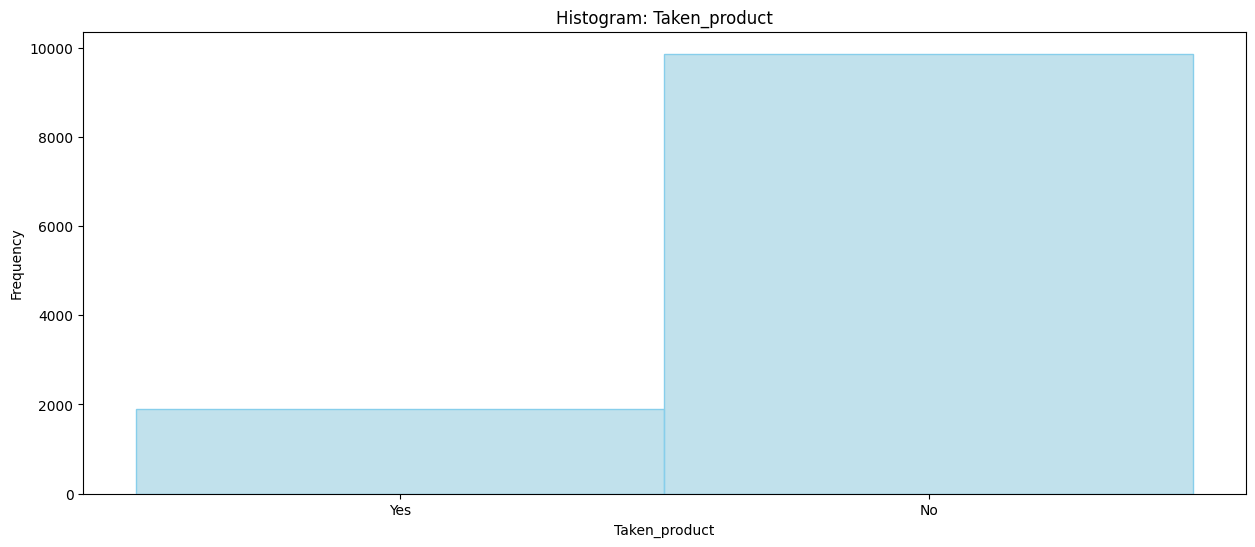

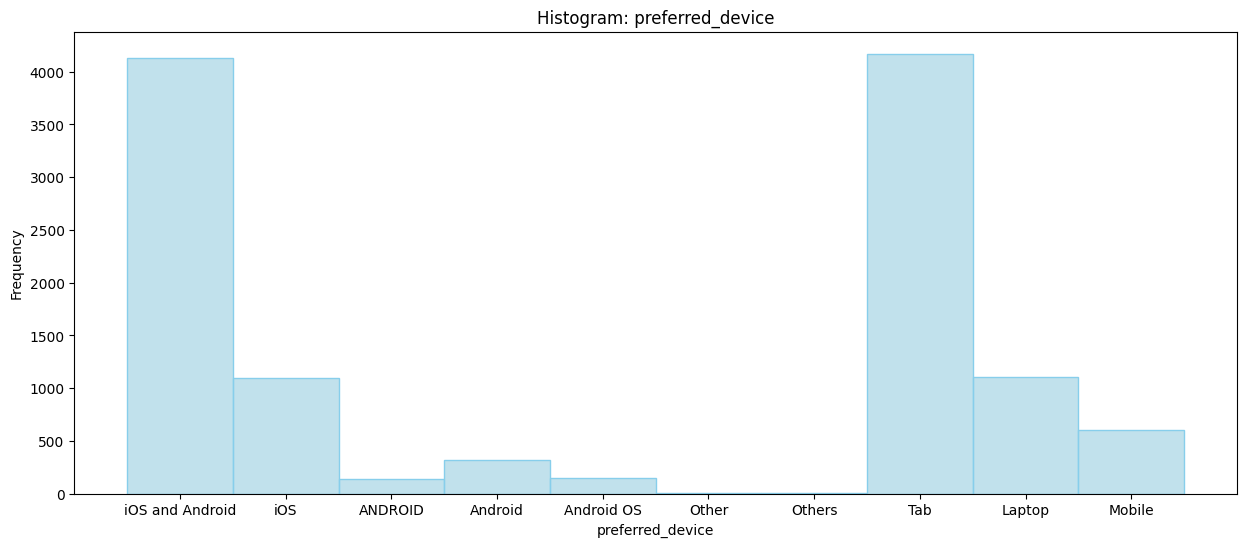

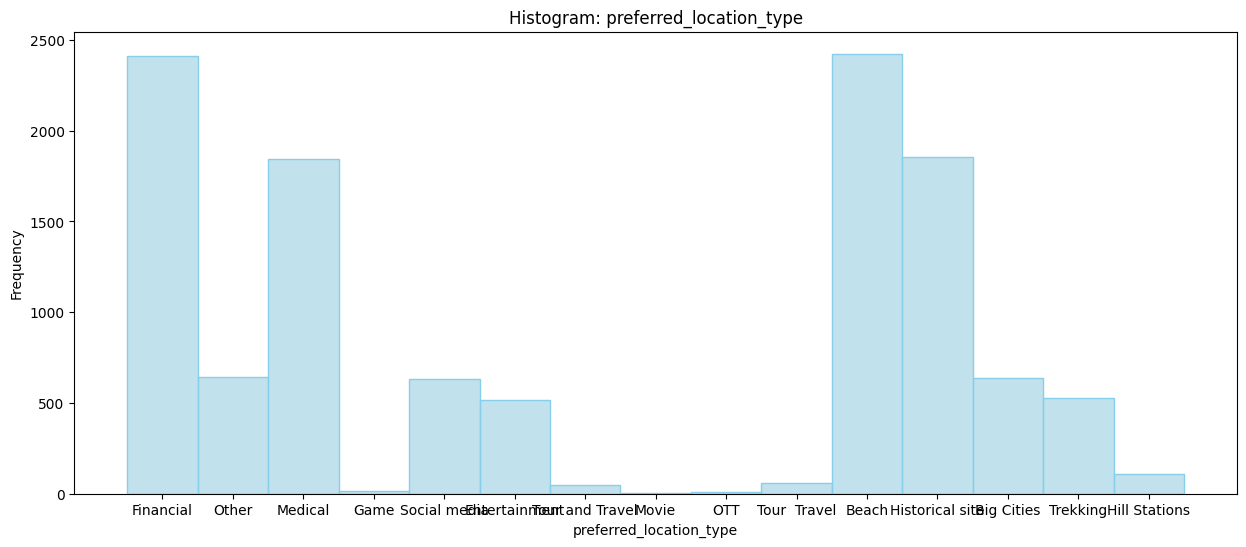

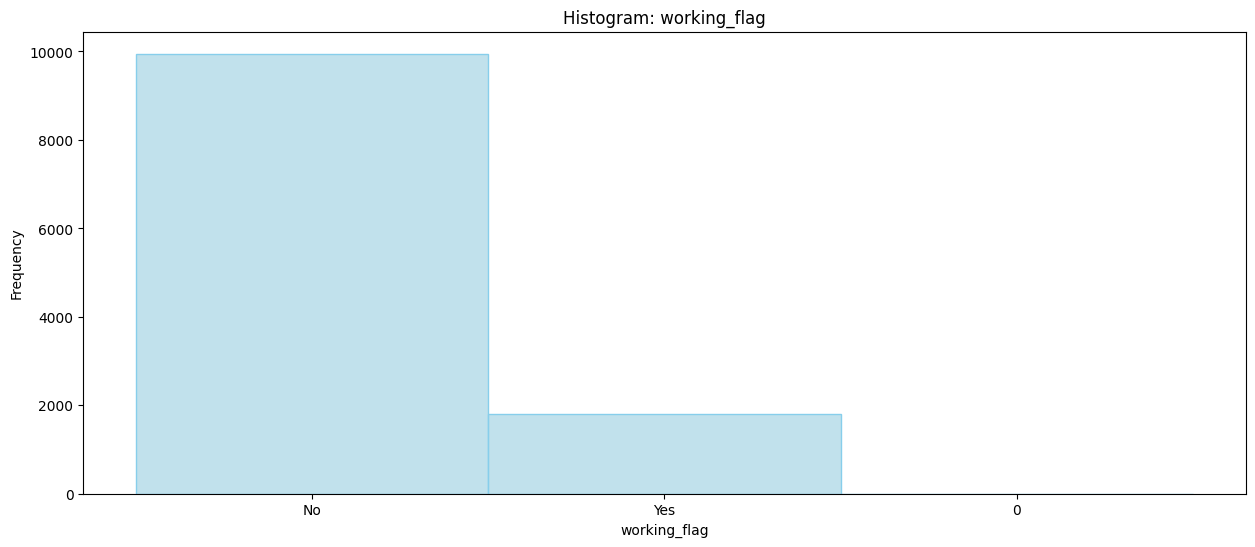

In [4]:
# Load the dataset from CSV
df = pd.read_csv('Customer behaviour Tourism.csv')

cat_columns= df.select_dtypes(exclude=['int64', 'float64'] )

for col in cat_columns:
    print(f"Value counts for column '{col}':")
    print(df[col].unique())
    print()

# EDA
string_important_columns = ['Taken_product', 'preferred_device','preferred_location_type', 'working_flag']
for column in string_important_columns:
    # Plot histogram for a specific column using Seaborn
    plt.figure(figsize=(15, 6))
    sns.histplot(df[column], bins=20, kde=False, color='lightblue', edgecolor='skyBlue')
    plt.title('Histogram: ' + column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [5]:
# Data Cleaning
# Fixing multiple values in preferred device
# Define a mapping for replacement

device_mapping= {'iOS and Android': 'Mobile',
          'iOS' : 'Mobile',
          'ANDROID' : 'Mobile',
          'Android': 'Mobile',
          'Android OS' : 'Mobile',
          'Other': 'Mobile',
          'Others' : 'Mobile',
          'Tab' : 'Mobile'}
df['preferred_device'] = df['preferred_device'].replace(device_mapping)
df['preferred_device'].unique()


# replace '*' with NAN in "yearly_avg_Outstation_checkins"
df['yearly_avg_Outstation_checkins']= df['yearly_avg_Outstation_checkins'].replace('*',np.nan)
df['yearly_avg_Outstation_checkins'] = pd.to_numeric(df['yearly_avg_Outstation_checkins'], errors='coerce', downcast='integer')

df['yearly_avg_Outstation_checkins'].unique()


# "member_in_family" column has "['Yes' 'No' 'Yeso' nan '1' '0']"
page_mapping= {'Yes': 1,
          'No' : 0,
          'Yeso' : 1}
df['following_company_page'] = df['following_company_page'].replace(page_mapping)
df['following_company_page'].unique()


# Change "following_company_page" column "Three" to 3
df['member_in_family']= df['member_in_family'].replace('Three',3)

# Post changing
df['member_in_family'] = pd.to_numeric(df['member_in_family'], errors='coerce', downcast='integer')
df['member_in_family'].unique()

df['working_flag']= df['working_flag'].replace('0','No')
df['working_flag'].unique()


df[["travelling_network_rating", "Adult_flag"]]= df[["travelling_network_rating", "Adult_flag"]].astype("object")
df.info()

##
num_columns = df.select_dtypes(exclude=['object']).drop(columns=['UserID'])

# Drop the 'UserID' column, it doesn't contribute to predictions
df.drop('UserID', axis=1, inplace=True)

#Negative values : The dataset features can not have negative values
negative_values = (num_columns < 0).any()
print("Columns with negative values:")
print(negative_values[negative_values].index)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11684 non-null  float64
 6   member_in_family                              11760 non-null  int8   
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

In [6]:
# Data pre-processing
# Columns & corresponding missing values

# Replace all string NaN values to Np.nan
df = df.applymap(lambda x: np.nan if x == 'nan' else x) 

# Check missing values from the dataset
RED, BOLD, RESET = '\033[91m', '\033[1m','\033[0m'
total_missing = df.isnull().sum().sum()
total_cells = df.size
missing_percentage = (total_missing / total_cells) * 100
print(f"The total number of missing values are {BOLD}{RED}{total_missing}{RESET}, which is {BOLD}{RED}{missing_percentage:.2f}%{RESET} of total data.")

# Check count and % of missing values in the dataset
missing = df.columns[df.isna().any()].tolist()
total_rows = len(df)
for column in missing:
    missing_count = df[column].isna().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"{BOLD}{column}{RESET} has {BOLD}{RED}{missing_count}{RESET} missing values, which is {BOLD}{RED}{missing_percentage:.2f}%{RESET} of the column.")

# Fill nan categorical columns with mode
cat_columns = ['preferred_device', 'preferred_location_type', 'following_company_page', 'working_flag', 'Adult_flag']
for i in cat_columns:
    df[i].fillna(df[i].mode()[0], inplace = True) #iloc[0]

# Fill nan numerical columns with median
num_columns = ['Yearly_avg_view_on_travel_page', 'total_likes_on_outstation_checkin_given', 'yearly_avg_Outstation_checkins', 'Yearly_avg_comment_on_travel_page', 'Daily_Avg_mins_spend_on_traveling_page']
for column in num_columns:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

# Check missing values post treatment
print('Missing Values in the dataset after treatment :', df.isnull().sum().sum())

# Duplicate Values
df.duplicated().sum()

df[["travelling_network_rating", "Adult_flag"]]= df[["travelling_network_rating", "Adult_flag"]].astype("object")
df.info()

The total number of missing values are 1433, which is 0.76% of total data.
Yearly_avg_view_on_travel_page has 581 missing values, which is 4.94% of the column.
preferred_device has 53 missing values, which is 0.45% of the column.
total_likes_on_outstation_checkin_given has 381 missing values, which is 3.24% of the column.
yearly_avg_Outstation_checkins has 76 missing values, which is 0.65% of the column.
preferred_location_type has 31 missing values, which is 0.26% of the column.
Yearly_avg_comment_on_travel_page has 206 missing values, which is 1.75% of the column.
following_company_page has 103 missing values, which is 0.88% of the column.
Adult_flag has 1 missing values, which is 0.01% of the column.
Daily_Avg_mins_spend_on_traveling_page has 1 missing values, which is 0.01% of the column.
Missing Values in the dataset after treatment : 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 16 columns):
 #   Column                          

In [7]:
# Initialize LabelEncoder
from sklearn.preprocessing import StandardScaler
label_encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = ['Taken_product', 'preferred_device', 'preferred_location_type', 'working_flag']

# Encode categorical columns
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# Separate features and target variable
X = df.drop('Taken_product', axis=1)
y = df['Taken_product']

sc = StandardScaler()
X = sc.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
df.describe()

,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,working_flag,Daily_Avg_mins_spend_on_traveling_page
count,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000
mean,0.161224,280.345153,0.905782,28167.420748,8.196259,2.921344,4.740901,74.793707,6531.699065,3.203571,28.660884,0.153741,13.817602
std,0.367754,66.511330,0.292144,14150.080463,8.650950,1.044883,3.934422,23.815280,4706.613785,2.616365,48.660793,0.360716,9.070604
min,0.000000,35.000000,0.000000,3570.000000,1.000000,1.000000,0.000000,3.000000,1009.000000,0.000000,4.000000,0.000000,0.000000
25%,0.000000,233.000000,1.000000,16697.250000,1.000000,2.000000,1.000000,57.000000,2940.750000,1.000000,17.000000,0.000000,8.000000
50%,0.000000,271.000000,1.000000,28076.000000,4.000000,3.000000,3.000000,75.000000,4948.000000,3.000000,22.000000,0.000000,12.000000
75%,0.000000,322.000000,1.000000,40115.250000,14.000000,4.000000,7.000000,92.000000,8393.250000,5.000000,27.000000,0.000000,18.000000
max,1.000000,464.000000,1.000000,252430.000000,29.000000,10.000000,14.000000,815.000000,20065.000000,11.000000,500.000000,1.000000,270.000000


In [8]:
from sklearn.model_selection import GridSearchCV

# Define a function to evaluate the model
def evaluate_model(model_name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy * 100:.4f}%')
    print(f'\n{model_name} Classification Report:')
    print(classification_report(y_test, y_pred))
    
    # Plot Confusion Matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(conf_matrix, annot=True, cmap='Greens', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name} Model')
    plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier

param_grid = {
    'max_features': [None, 'sqrt', 'log2'],  # Number of features to consider at each split
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

# Apply Grid Search for Hyperparameter Tuning
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("best parameters", best_params)

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42, **best_params)

# Train the model
rf_classifier.fit(X_train, y_train)
evaluate_model('RF', rf_classifier, X_test, y_test)

best parameters {'learning_rate': 0.1, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 200}
XGB Accuracy: 99.6173%

XGB Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1958
           1       1.00      0.98      0.99       394

    accuracy                           1.00      2352
   macro avg       1.00      0.99      0.99      2352
weighted avg       1.00      1.00      1.00      2352



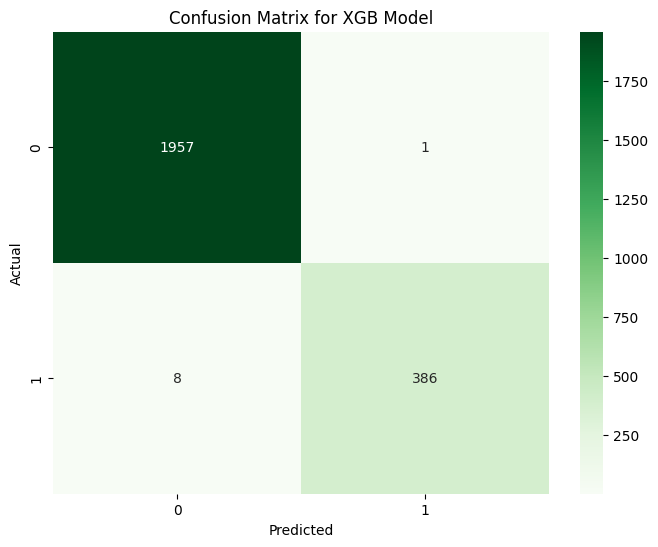

In [10]:
from xgboost import XGBClassifier

# XGBoost

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],  # Step size shrinkage to prevent overfitting
    'n_estimators': [50, 100, 200],  # Number of boosting rounds
    'max_depth': [3, 5, 7, 9],  # Maximum depth of a tree
    'min_child_weight': [1, 3, 5],  # Minimum sum of instance weight needed in a child
}

# Apply Grid Search for Hyperparameter Tuning
grid_search = GridSearchCV(XGBClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("best parameters", best_params)

# Initialize XGB
xgb_model = XGBClassifier(random_state=42, **best_params)

# Train the model
xgb_model.fit(X_train, y_train)
evaluate_model('XGB', xgb_model, X_test, y_test)

Best Parameters: {'C': 100, 'gamma': 0.1}
SVC Accuracy: 98.6395%

SVC Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1958
           1       0.97      0.95      0.96       394

    accuracy                           0.99      2352
   macro avg       0.98      0.97      0.98      2352
weighted avg       0.99      0.99      0.99      2352



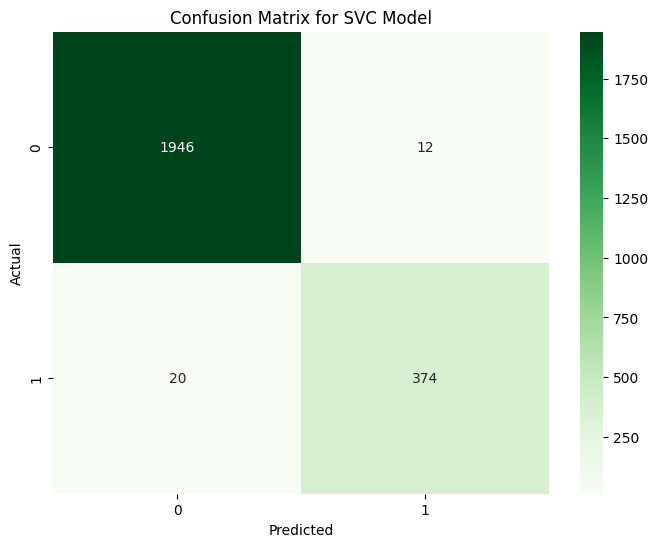

In [10]:
from sklearn.svm import SVC

# Support Vector Classification

param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.1, 0.01],
}


# Apply Grid Search for Hyperparameter Tuning
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Initialize SVC
svm_classifier = SVC(**best_params)

# Train the model
svm_classifier.fit(X_train, y_train)
evaluate_model('SVC', svm_classifier, X_test, y_test)


Best Hyperparameters: {'C': 10, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
Logistic Accuracy: 85.9269%

Logistic Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1958
           1       0.76      0.24      0.36       394

    accuracy                           0.86      2352
   macro avg       0.81      0.61      0.64      2352
weighted avg       0.85      0.86      0.83      2352



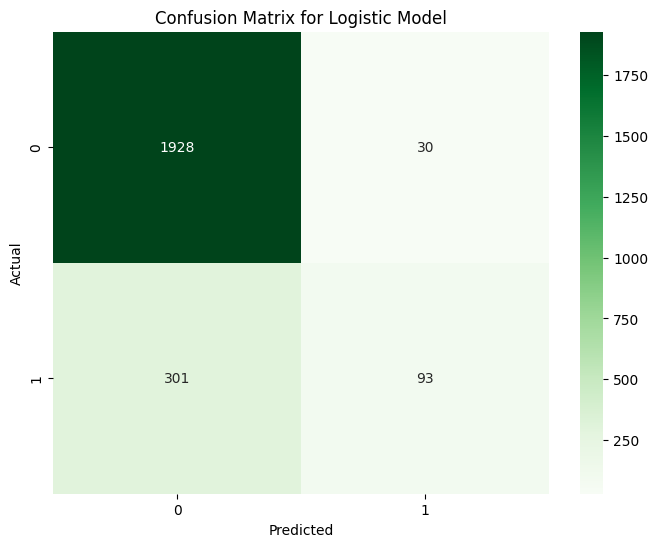

In [11]:
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Regularization parameter
    'penalty': ['l2'],  # Regularization type (lbfgs only supports 'l2')
    'solver': ['liblinear', 'lbfgs'],  # Algorithm to use in the optimization problem
    'class_weight': [None, 'balanced']
}

# Apply Grid Search for Hyperparameter Tuning
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Initialize Logistic Regression
logreg_classifier = LogisticRegression(random_state=42, **best_params)

# Train the model
logreg_classifier.fit(X_train, y_train)
evaluate_model('Logistic', logreg_classifier, X_test, y_test)